# Online Retails Purchase

### Introduction:



### Step 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Step 2. Import the dataset from this [Online_Retail.csv](https://raw.githubusercontent.com/guipsamora/pandas_exercises/master/Visualization/Online_Retail/Online_Retail.csv) from the folder.

In [2]:
online_rt = pd.read_csv("Exercise Data Files/Pandas Exercise Online Retail files/Online_Retail.csv", encoding = "latin")

### Step 3. Assign it to a variable called online_rt

In [3]:
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 4. Create a histogram with the 10 countries that have the most 'Quantity' ordered except UK

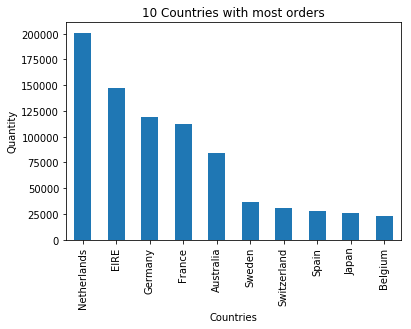

In [7]:
countries = online_rt.groupby('Country').sum()
countries = countries.sort_values('Quantity',ascending = False)[1:11]
countries['Quantity'].plot(kind='bar')
plt.xlabel('Countries')
plt.ylabel('Quantity')
plt.title('10 Countries with most orders')
plt.show()

### Step 5.  Exclude negative Quatity entries

In [5]:
online_rt = online_rt[online_rt.Quantity > 0]
online_rt.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/10 8:26,3.39,17850.0,United Kingdom


### Step 6. Create a scatterplot with the Quantity per UnitPrice by CustomerID for the top 3 Countries

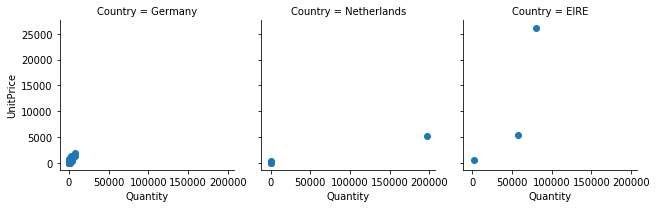

In [6]:
customers = online_rt.groupby(['CustomerID','Country']).sum()
customers = customers[customers.UnitPrice > 0]
customers['Country'] = customers.index.get_level_values(1)
top_countries =  ['Netherlands', 'EIRE', 'Germany']
customers = customers[customers['Country'].isin(top_countries)]
g = sns.FacetGrid(customers, col="Country")
g.map(plt.scatter, "Quantity", "UnitPrice", alpha=1)
g.add_legend()